In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
want_data = '_val' # _train, _val
use_smooth = True
save_fig = False

show_label_start = 0
show_label_end = 50

def lbound(x):
    a = []
    for i in x:
        a.append(max(0.0,i))
    return a
def hbound(x):
    a = []
    for i in x:
        a.append(min(1.0,i))
    return a

In [172]:
log_algo = 'loganomaly_sl'
fl_algo = 'fedadam_10e_12_2'

la_x_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_x_loss = np.sum([la_x_loss, df['loss']], axis = 0)
    del df
    
la_x_loss = la_x_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0'

la_0_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_0_loss = np.sum([la_0_loss, df['loss']], axis = 0)
    del df
    
la_0_loss = la_0_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.01'

la_001_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_001_loss = np.sum([la_001_loss, df['loss']], axis = 0)
    del df
    
la_001_loss = la_001_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.03'

la_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_003_loss = np.sum([la_003_loss, df['loss']], axis = 0)
    del df
    
la_003_loss = la_003_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.05'

la_005_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_005_loss = np.sum([la_005_loss, df['loss']], axis = 0)
    del df
    
la_005_loss = la_005_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.07'

la_007_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_007_loss = np.sum([la_007_loss, df['loss']], axis = 0)
    del df
    
la_007_loss = la_007_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.1'

la_010_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_010_loss = np.sum([la_010_loss, df['loss']], axis = 0)
    del df
    
la_010_loss = la_010_loss/5

###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedadam_10e_12_0.02'

la_002_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_002_loss = np.sum([la_002_loss, df['loss']], axis = 0)
    del df
    
la_002_loss = la_002_loss/5

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


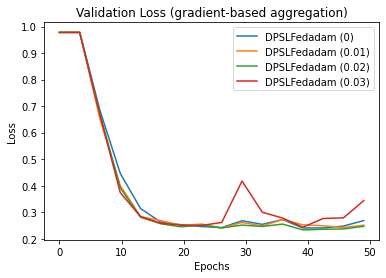

In [173]:
name = ['SLFedadam', 'DPSLFedadam (0)', 'DPSLFedadam (0.01)','DPSLFedadam (0.02)', 'DPSLFedadam (0.03)']
data = ['la_x_loss', 'la_0_loss', 'la_001_loss', 'la_002_loss', 'la_003_loss']
for j, i in enumerate(data[1:]):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
    fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.8, optimized=False)    
        
 # label = name[j+1]
    plt.plot(x, fit2.fittedvalues, label = name[j+1])
#     plt.plot(x, y, label = name[j+1])


plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss (gradient-based aggregation)')
plt.legend()

# plt.savefig('../result/fig/dpslfedadam_all_loss_1.svg', bbox_inches='tight', format="svg")
plt.show()

In [174]:
log_algo = 'loganomaly_sl'
fl_algo = 'fedavg_10e_12'

la_x_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_x_loss = np.sum([la_x_loss, df['loss']], axis = 0)
    del df
    
la_x_loss = la_x_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0_1'

la_0_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_0_loss = np.sum([la_0_loss, df['loss']], axis = 0)
    del df
    
la_0_loss = la_0_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0.01'

la_001_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_001_loss = np.sum([la_001_loss, df['loss']], axis = 0)
    del df
    
la_001_loss = la_001_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0.03'

la_003_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_003_loss = np.sum([la_003_loss, df['loss']], axis = 0)
    del df
    
la_003_loss = la_003_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0.05'

la_005_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_005_loss = np.sum([la_005_loss, df['loss']], axis = 0)
    del df
    
la_005_loss = la_005_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0.07'

la_007_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_007_loss = np.sum([la_007_loss, df['loss']], axis = 0)
    del df
    
la_007_loss = la_007_loss/5
###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0.1'

la_010_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_010_loss = np.sum([la_010_loss, df['loss']], axis = 0)
    del df
    
la_010_loss = la_010_loss/5

###################################
log_algo = 'loganomaly_sl_dp'
fl_algo = 'fedavg_10e_12_0.02'

la_002_loss = np.zeros(shape=(50))

for i in range(1,6):
    string = '../result/' + log_algo +  '/' + fl_algo + '/client_' + str(i) + want_data +'_log.csv'
    df = pd.read_csv(string)
    la_002_loss = np.sum([la_002_loss, df['loss']], axis = 0)
    del df
    
la_002_loss = la_002_loss/5

D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


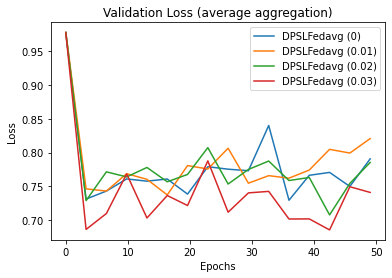

In [175]:
name = ['SLFedavg', 'DPSLFedavg (0)', 'DPSLFedavg (0.01)','DPSLFedavg (0.02)', 'DPSLFedavg (0.03)',  'DPSLFedavg (0.07)', 'DPSLFedavg (0.10)']
data = ['la_x_loss', 'la_0_loss', 'la_001_loss', 'la_002_loss', 'la_003_loss']
for j, i in enumerate(data[1:]):
    x = np.arange(show_label_start,show_label_end)
    exec('y = ' + i + '[show_label_start:show_label_end]')
    if use_smooth:
        c = interp1d(x,y, kind = "cubic")
        x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/3))
        y = c(x)
        y = lbound(y)
        
    fit2 = ExponentialSmoothing(y).fit(smoothing_level=0.8, optimized=False)    
        
 # label = name[j+1]
#     plt.plot(x, fit2.fittedvalues, label = name[j+1])
    plt.plot(x, y, label = name[j+1])

plt.xlabel('Epochs')
plt.ylabel('Loss')
if 'train' in want_data:
    plt.title('Training Loss')
else:
    plt.title('Validation Loss (average aggregation)')
plt.legend()

# plt.savefig('../result/fig/dpslfedavg_all_loss_1.svg', bbox_inches='tight', format="svg")
plt.show()

In [17]:
# log_algo = 'loganomaly_sl'
# fl_algo = 'fedadam_10e_12_2'

# la_x_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_x_f1 = np.mean(np.array(df), axis = 0)
#     del df

# ###################################
# log_algo = 'loganomaly_sl_dp'
# fl_algo = 'fedadam_10e_12_0'

# la_0_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_0_f1 = np.mean(np.array(df), axis = 0)
#     del df
    
# ###################################
# log_algo = 'loganomaly_sl_dp'
# fl_algo = 'fedadam_10e_12_0.01'

# la_001_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_001_f1 = np.mean(np.array(df), axis = 0)
#     del df
    
# ###################################
# log_algo = 'loganomaly_sl_dp'
# fl_algo = 'fedadam_10e_12_0.03'

# la_003_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_003_f1 = np.mean(np.array(df), axis = 0)
#     del df

# ###################################
# log_algo = 'loganomaly_sl_dp'
# fl_algo = 'fedadam_10e_12_0.05'

# la_005_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_005_f1 = np.mean(np.array(df), axis = 0)
#     del df
    
# ###################################
# log_algo = 'loganomaly_sl_dp'
# fl_algo = 'fedadam_10e_12_0.07'

# la_007_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_007_f1 = np.mean(np.array(df), axis = 0)
#     del df
    
# ###################################
# log_algo = 'loganomaly_sl_dp'
# fl_algo = 'fedadam_10e_12_0.1'

# la_010_f1 = np.zeros(shape=(50))

# for i in range(1,6):
#     string = '../result/' + log_algo +  '/' + fl_algo + '/f1.csv'
#     df = pd.read_csv(string)
#     la_010_f1 = np.mean(np.array(df), axis = 0)
#     del df
    

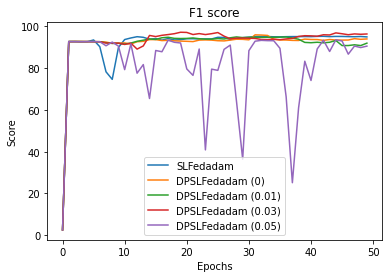

In [64]:
# name = ['SLFedadam', 'DPSLFedadam (0)', 'DPSLFedadam (0.01)', 'DPSLFedadam (0.03)', 'DPSLFedadam (0.05)', 'DPSLFedadam (0.07)', 'DPSLFedadam (0.10)']
# data = ['la_x_f1', 'la_0_f1', 'la_001_f1', 'la_003_f1', 'la_005_f1', 'la_007_f1', 'la_010_f1']
# for j, i in enumerate(data[:5]):
#     x = np.arange(show_label_start,show_label_end)
#     exec('y = ' + i + '[show_label_start:show_label_end]')
    
#     if use_smooth:
#         c = interp1d(x,y, kind = "cubic")
#         x = np.linspace(x.min(), x.max(), int((show_label_end-show_label_start)/5))
#         y = c(x)
#         y = lbound(y)
        
#     plt.plot(x, y, label = name[j])

# plt.xlabel('Epochs')
# plt.ylabel('Score')
# # if 'train' in want_data:
# #     plt.title('Training Loss')
# # else:
# #     plt.title('Validation Loss')
# plt.title('F1 score')
# plt.legend()
# if save_fig:
#     plt.savefig('../result/fig/'+ want_data[1:] +'_loss.svg', bbox_inches='tight', format="svg")
# plt.show()

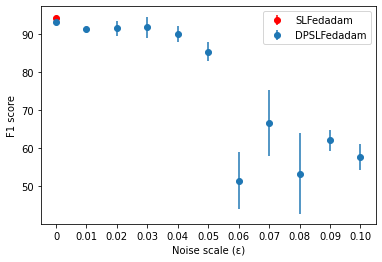

In [5]:
# name = ['SLFedadam', 'DPSLFedadam(0)', 'DPSLFedadam(0.01)', 'DPSLFedadam(0.03)', 'DPSLFedadam(0.05)', 'DPSLFedadam(0.07)', 'DPSLFedadam(0.10)']
# name = ['0', '0.01', '0.03', '0.05', '0.07', '0.10']
# f1 = [95.067, 94.417, 91.976, 90.697, 81.660, 80.926, 57.001]
# recall = [93.752, 94.938, 94.120, 97.880, 69.435, 40.038, 68.360]
# precision = [96.419, 93.901, 89.928, 95.542, 99.109, 98.907, 99.151]
f1 = [94.3,93.197,91.49933333,91.58833333,91.81433333,90.10846667,85.437,51.45,66.59066667,53.277,62.01615111,57.71359434]
err = [0.469696178,0.747094372,0.291897528,2.024911521,2.748092187,2.141356586,2.507198536,7.412396812,8.8004892,10.62657897,2.85519043,3.40316899]
name = ['0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.10']

# plt.scatter('0', f1[0], c = 'r', s = 50)
# plt.scatter(name, f1[1:], s = 50)
plt.errorbar('0', f1[0], err[0], c = 'r', marker = 'o', linestyle='None')
plt.errorbar(name, f1[1:], err[1:], marker = 'o', linestyle='None')
plt.xlabel('Noise scale (\u03B5)')
plt.ylabel('F1 score')
plt.legend(("SLFedadam", "DPSLFedadam"))
plt.plot()
# plt.savefig('../result/fig/dpslfedadam_f1_1.svg', bbox_inches='tight', format="svg")
plt.show()

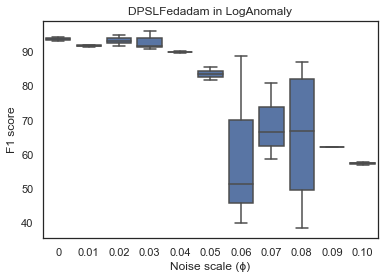

In [4]:
import seaborn as sns
import pandas as pd
# sns.set(style="whitegrid")
sns.set(style="white")
x_00 = [94.417, 93.197]
x_01 = [91.976, 91.49933333]
x_02 = [94.895, 91.58833333] 
x_03 = [90.697, 96.137, 91.81433333]
x_04 = [89.737, 90.10846667]
x_05 = [81.660, 85.437]
x_06 = [40.027, 88.694, 51.45]
x_07 = [80.926, 58.545, 66.59066667]
x_08 = [87.053, 38.362, 80.416, 53.277]
x_09 = [62.202, 62.01615111]
x_10 = [57.001, 57.71359434]

x = [x_00, x_01, x_02, x_03, x_04, x_05, 
     x_06, x_07, x_08, x_09, x_10]
name = ['0', '0.01', '0.02', '0.03', '0.04', '0.05', 
        '0.06', '0.07', '0.08', '0.09', '0.10']
grades = []
for i,j in enumerate(x):
    for k in j:
        grades.append([name[i], k])

grades = pd.DataFrame(grades)
grades.columns = ['Scale', 'Score']


sns.boxplot(x = grades['Scale'], y = grades['Score'], color ='b')#linewidth=1
plt.xlabel('Noise scale (\u03D5)')
plt.ylabel('F1 score')
plt.title("DPSLFedadam in LogAnomaly")
plt.show()

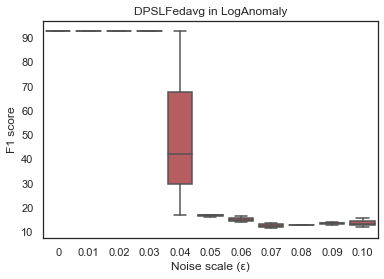

In [84]:
x_00 = [92.777,92.771,92.77433333]
x_01 = [92.775,92.775, 92.83133333]
x_02 = [92.944,92.916, 92.94233333] 
x_03 = [92.967,92.967, 92.948]
x_04 = [16.827,92.967, 42.19966667]
x_05 = [16.805,16.805, 15.90566667]
x_06 = [14.107,16.615, 14.72366667]
x_07 = [13.449,11.322, 12.446]
x_08 = [12.567,12.567, 12.83466667]
x_09 = [13.370,12.567, 13.81666667]
x_10 = [15.513,12.061, 13.21166667]

x = [x_00, x_01, x_02, x_03, x_04, x_05, 
     x_06, x_07, x_08, x_09, x_10]
name = ['0', '0.01', '0.02', '0.03', '0.04', '0.05', 
        '0.06', '0.07', '0.08', '0.09', '0.10']
grades2 = []
for i,j in enumerate(x):
    for k in j:
        grades2.append([name[i], k])

grades2 = pd.DataFrame(grades2)
grades2.columns = ['Scale', 'Score']

sns.boxplot(x = grades2['Scale'], y = grades2['Score'], color = 'r')
plt.xlabel('Noise scale (\u03B5)')
plt.ylabel('F1 score')
plt.title("DPSLFedavg in LogAnomaly")
plt.show()

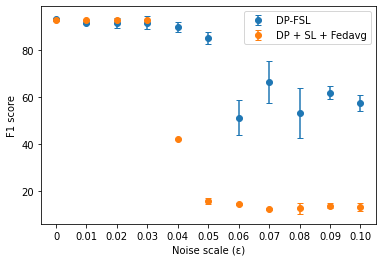

In [9]:
# name = ['SLFedadam', 'DPSLFedadam(0)', 'DPSLFedadam(0.01)', 'DPSLFedadam(0.03)', 'DPSLFedadam(0.05)', 'DPSLFedadam(0.07)', 'DPSLFedadam(0.10)']
# name = ['0', '0.01', '0.03', '0.05', '0.07', '0.10']
# f1 = [95.067, 94.417, 91.976, 90.697, 81.660, 80.926, 57.001]
# recall = [93.752, 94.938, 94.120, 97.880, 69.435, 40.038, 68.360]
# precision = [96.419, 93.901, 89.928, 95.542, 99.109, 98.907, 99.151]
f1_adam = [94.3, 93.197,91.49933333,91.58833333,91.81433333,90.10846667,85.437,51.45,66.59066667,53.277,62.01615111,57.71359434]
err_adam = [0.469696178,0.747094372,0.291897528,2.024911521,2.748092187,2.141356586,2.507198536,7.412396812,8.8004892,10.62657897,2.85519043,3.40316899]

name = ['0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.10']

f1_avg = [93.558, 92.77433333, 92.83133333, 92.94233333, 92.948, 42.19966667, 15.90566667, 14.72366667, 12.446, 12.83466667, 13.81666667, 13.21166667]
err_avg = [0, 0.001, 0.0845, 0.0115, 0.0285, 0.011, 1.349, 0.329, 0.441, 2.4015, 1.0715, 1.726]

# plt.scatter('0', f1_adam[0], c = 'r', s = 50)
# plt.scatter(name, f1[1:], s = 50)
# plt.errorbar('0', f1_adam[0], err_adam[0], c = 'r', marker = 'o', linestyle='None')
plt.errorbar(name, f1_adam[1:], err_adam[1:], marker = 'o', linestyle='None', capsize=3)
# plt.errorbar('0', f1_avg[0], err_avg[0], c = 'r', marker = 'o', linestyle='None')
plt.errorbar(name, f1_avg[1:], err_avg[1:], marker = 'o', linestyle='None', capsize=3)
plt.xlabel('Noise scale (\u03B5)')
plt.ylabel('F1 score')
plt.legend(("DP-FSL", "DP + SL + Fedavg"))
plt.plot()
# plt.savefig('../result/fig/dpslfed_f1.svg', bbox_inches='tight', format="svg")
plt.show()

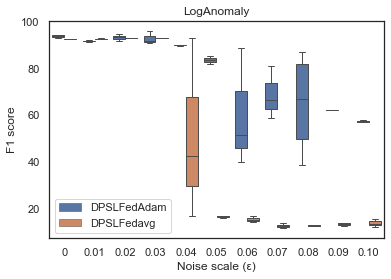

In [100]:
grades['Label'] = 'DPSLFedAdam'
grades2['Label'] = 'DPSLFedavg'
grades_sum = pd.concat([grades,grades2])

ax = sns.boxplot(x = 'Scale', y = 'Score',data = grades_sum, hue = 'Label', linewidth = 1)
plt.xlabel('Noise scale (\u03B5)')
plt.ylabel('F1 score')
plt.title('LogAnomaly')
ax.legend()
# plt.savefig('../result/fig/dpslfedadam_f1_1.svg', bbox_inches='tight', format="svg")
plt.show()

In [11]:
plt.scatter('0', recall[0], c = 'r', s = 50)
plt.scatter(name, recall[1:], s = 50)
plt.xlabel('Noise scale (\u03B5)')
plt.ylabel('Recall')
plt.legend(("SLFedadam", "DPSLFedadam"))
plt.plot()
plt.show()

NameError: name 'recall' is not defined

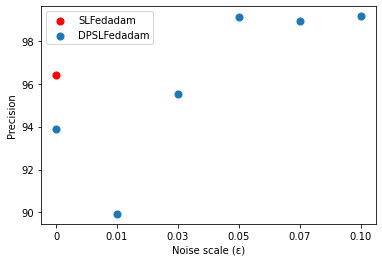

In [93]:
plt.scatter('0', precision[0], c = 'r', s = 50)
plt.scatter(name, precision[1:], s = 50)
plt.xlabel('Noise scale (\u03B5)')
plt.ylabel('Precision')
plt.legend(("SLFedadam", "DPSLFedadam"))
plt.plot()
plt.show()

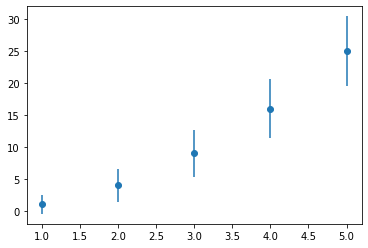

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.array([1, 2, 3, 4, 5])
# y = np.power(x, 2) # Effectively y = x**2
# e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])
# plt.errorbar(x, y, e, marker = 'o', linestyle='None')

# plt.show()